#### Stable Diffusion Model

In [ ]:
# Step 1: Install necessary packages
!pip install pycocotools pillow
!pip install opencv-python

In [ ]:
from google.colab import drive
import kagglehub

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
# !kaggle datasets download -d kmahesh541/flowershd5dataset -p "/content/drive/My Drive/flowers" --unzip

Dataset URL: https://www.kaggle.com/datasets/kmahesh541/flowershd5dataset
License(s): unknown
100% 3.46G/3.47G [01:01<00:00, 38.8MB/s]
100% 3.47G/3.47G [01:02<00:00, 60.1MB/s]


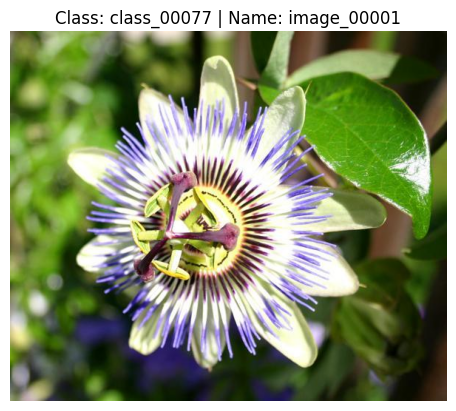

Class Label: class_00077
Embeddings (first 10 values): [ 0.10226855 -0.0868825   0.03414105 -0.02046936  0.15935501 -0.03317489
  0.03720499  0.23764007 -0.05084452  0.13234071] ...
Image Name: image_00001
Text Description: prominent purple stigma,petals are white inc olor



In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

# Path to your HDF5 file
file_path = '/content/drive/MyDrive/Flowers/flowers/flowers-hd5/data/flowers/flowers.hdf5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as f:
    # Select one sample from the train group
    image_group = f['train/image_00001_0']

    # Get the class label
    class_label = image_group['class'][()].decode('utf-8')  # Decode to string if stored as bytes

    # Get the embeddings
    embeddings = np.array(image_group['embeddings'])

    # Get the name of the image
    image_name = image_group['name'][()].decode('utf-8')  # Decode to string if stored as bytes

    # Load the image data (assuming it's stored as binary data)
    img_data = image_group['img'][()]

    # Get the text description
    text_description = image_group['txt'][()].decode('utf-8')  # Decode to string if stored as bytes

    # Decode and display the image if it’s in a recognizable format (e.g., JPEG)
    try:
        image = Image.open(io.BytesIO(img_data))
        plt.imshow(image)
        plt.title(f'Class: {class_label} | Name: {image_name}')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("Image could not be displayed:", e)

    # Print all elements
    print("Class Label:", class_label)
    print("Embeddings (first 10 values):", embeddings[:10], "...")  # Show a portion of the embeddings
    print("Image Name:", image_name)
    print("Text Description:", text_description)

In [ ]:
import h5py

# Path to your HDF5 file
file_path = '/content/drive/MyDrive/Flowers/flowers/flowers-hd5/data/flowers/flowers.hdf5'
f = h5py.File(file_path)

#1. to know the categories in hdf5 file
print(list(f))
print("\nNo. of items in test = ",len(list(f['test'])))
print("\nNo. of items in train = ",len(list(f['train'])))
print("\nNo. of items in valid = ",len(list(f['valid'])))


['test', 'train', 'valid']

No. of items in test =  5775

No. of items in train =  29390

No. of items in valid =  5780


In [ ]:
!pip install transformers[torch]
!pip install pillow

In [ ]:
!pip install transformers[torch]
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-oxh_douc
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-oxh_douc
  Resolved https://github.com/huggingface/transformers.git to commit f297af55dfc27485189f352cd36b4683de12e0b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install diffusers
!pip install transformers
!pip install accelerate
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from diffusers import StableDiffusionPipeline
from transformers import CLIPTextModel, CLIPTokenizer
import torch

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import h5py
import numpy as np
from datasets import Dataset, DatasetDict

def read_hdf5(file_path):
    data = {'image': [], 'class': [], 'embeddings': [], 'name': [], 'text': []}

    with h5py.File(file_path, 'r') as f:
        for key in f['train']:
            image_group = f['train'][key]

            # Load data
            class_label = image_group['class'][()].decode('utf-8')
            embeddings = np.array(image_group['embeddings'])
            image_name = image_group['name'][()].decode('utf-8')
            img_data = image_group['img'][()]
            text_description = image_group['txt'][()].decode('utf-8')

            # Append to data dictionary
            data['image'].append(img_data)
            data['class'].append(class_label)
            data['embeddings'].append(embeddings)
            data['name'].append(image_name)
            data['text'].append(text_description)

    return data

file_path = '/content/drive/MyDrive/Flowers/flowers/flowers-hd5/data/flowers/flowers.hdf5'
data = read_hdf5(file_path)

In [ ]:
dataset = Dataset.from_dict(data)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

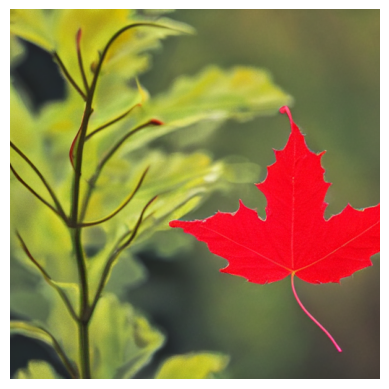

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Define your text prompt
prompt = "A yellow flower with red leaves"

# Generate the image
image = pipe(prompt).images[0]

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
import h5py
import numpy as np
from PIL import Image
from torchvision import transforms
import os
import io

# Path to your HDF5 file
file_path = '/content/drive/MyDrive/Flowers/flowers/flowers-hd5/data/flowers/flowers.hdf5'

# Output directories for images and text prompts
output_image_dir = '/content/drive/MyDrive/flowers/images'
output_text_file = '/content/drive/MyDrive/flowers/prompts.txt'
os.makedirs(output_image_dir, exist_ok=True)

# Transformation for resizing images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Stable Diffusion's default resolution
])

# Limit the number of images
max_images = 200
processed_count = 0

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    with open(output_text_file, 'w') as text_file:
        for i, key in enumerate(f['train']):
            if processed_count >= max_images:
                break

            image_group = f['train'][key]

            try:
                # Extract binary image data and decode using PIL
                img_data = image_group['img'][()]
                img = Image.open(io.BytesIO(img_data)).convert("RGB")

                # Resize and save image
                img = transform(img)
                img_path = os.path.join(output_image_dir, f'image_{processed_count:05d}.png')
                img.save(img_path)

                # Extract and save text description
                text_description = image_group['txt'][()].decode('utf-8')
                text_file.write(f'{img_path}\t{text_description}\n')

                processed_count += 1

                # Optional: Print progress
                if processed_count % 100 == 0:
                    print(f'Processed {processed_count} images')

            except Exception as e:
                print(f"Error processing image {key}: {e}")


Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Processed 2000 images


In [ ]:
from google.colab import drive
import kagglehub

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from diffusers import StableDiffusionPipeline, DDPMScheduler, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTokenizer
from torch.optim import AdamW
from tqdm.auto import tqdm

class FlowerDataset(Dataset):
    def __init__(self, image_dir, prompt_file, transform=None):
        self.image_dir = image_dir
        self.prompts = []
        self.transform = transform
        self.tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")

        with open(prompt_file, 'r') as file:
            for i, line in enumerate(file):
                try:
                    # Split only on the first tab to ensure the prompt remains intact
                    img_path, prompt = line.strip().split('\t', 1)
                    self.prompts.append((img_path, prompt))
                except ValueError:
                    continue

    def __len__(self):
        return len(self.prompts)

    def __getitem__(self, idx):
        img_path, prompt = self.prompts[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize the text prompt
        text_inputs = self.tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt", max_length=77)
        return image, text_inputs["input_ids"].squeeze()

# Transformations for Images
transform = Compose([
    Resize((64, 64)),
    ToTensor(),
    Normalize([0.5], [0.5]),  # Normalize to range [-1, 1] as required by Stable Diffusion
])

# Dataset and Dataloader
dataset = FlowerDataset(
    image_dir='/content/drive/MyDrive/flowers/images',
    prompt_file = '/content/drive/MyDrive/flowers/prompts.txt',
    transform=transform
)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Load Pretrained Stable Diffusion Components
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Extract U-Net, text encoder, and scheduler
unet = pipe.unet
text_encoder = pipe.text_encoder
scheduler = DDPMScheduler.from_config(pipe.scheduler.config)




The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import torch
from torch.nn.utils import clip_grad_norm_
from torch.optim import AdamW

# Ensure the model is in FP32
unet = unet.to(torch.float32)  # Ensure the model is in FP32

# Optimizer
optimizer = AdamW(unet.parameters(), lr=1e-6)  # Use a smaller learning rate

# Training Loop
epochs = 10
device = "cuda"
unet.train()

batch_size = 1  # Adjust batch size as needed for memory constraints
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0.0
    for batch in dataloader:
        images, input_ids = batch
        images = images.to(device, dtype=torch.float32)  # Ensure images are in FP32
        input_ids = input_ids.to(device, dtype=torch.long)  # Ensure input_ids are in long type

        # Generate noise (ensure noise is in FP32)
        noise = torch.randn_like(images, dtype=torch.float32)  # Ensure noise is in FP32

        # Check for NaNs or Infs in the noise or images
        if torch.isnan(images).any() or torch.isinf(images).any():
            print("NaN or Inf found in images")
            break
        if torch.isnan(noise).any() or torch.isinf(noise).any():
            print("NaN or Inf found in noise")
            break

        timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (images.shape[0],), device=device).long()

        # Add noise to the images
        noisy_images = scheduler.add_noise(images, noise, timesteps)

        # Ensure the input to the U-Net has 4 channels
        noisy_images = torch.cat([noisy_images, noise[:, :1, :, :]], dim=1)

        # Encode the text (ensure this is in FP32 as well)
        encoder_hidden_states = text_encoder(input_ids)[0].to(torch.float32)  # Ensure it's FP32

        # Predict the noise residual (ensure this operation is done in FP32)
        noise_pred = unet(noisy_images, timesteps, encoder_hidden_states).sample

        # Compute loss with matching noise tensor
        loss = torch.nn.functional.mse_loss(noise_pred[:, :3, :, :], noise)

        # Check if loss is NaN
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print("NaN or Inf found in loss")
            break

        loss.backward()

        # Apply gradient clipping
        clip_grad_norm_(unet.parameters(), max_norm=1.0)

        optimizer.step()
        optimizer.zero_grad()

        # Accumulate loss for logging at the end of the epoch
        epoch_loss += loss.item()

    # Print the average loss for the epoch
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {epoch_loss / len(dataloader):.4f}")

    # Save checkpoint
    torch.save(unet.state_dict(), f"unet_epoch_{epoch + 1}.pt")

print("Fine-tuning complete!")


Epoch 1/10
Epoch 1/10 - Loss: 0.3000
Epoch 2/10
Epoch 2/10 - Loss: 0.2657
Epoch 3/10
Epoch 3/10 - Loss: 0.2314
Epoch 4/10
Epoch 4/10 - Loss: 0.1971
Epoch 5/10
Epoch 5/10 - Loss: 0.1629
Epoch 6/10
Epoch 6/10 - Loss: 0.1286
Epoch 7/10
Epoch 7/10 - Loss: 0.0943
Epoch 8/10
Epoch 8/10 - Loss: 0.0600
Epoch 9/10
Epoch 9/10 - Loss: 0.0549
Epoch 10/10
Epoch 10/10 - Loss: 0.0248
Fine-tuning complete!


In [ ]:

import shutil  # To move or copy files



# Define the path where the model is saved temporarily
temp_model_path = '/content/unet_epoch_1.pt'

# Define the target path in Google Drive where you want to save the model
google_drive_path = '/content/drive/MyDrive/Flowers/unet_epoch_2.pt'  # Adjust this as needed

# Move the model from the temporary location to Google Drive
shutil.move(temp_model_path, google_drive_path)

print(f"Model successfully moved to {google_drive_path}")


Model successfully moved to /content/drive/MyDrive/Flowers/unet_epoch_2.pt


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler
from transformers import CLIPTextModel, CLIPTokenizer

# Load the Stable Diffusion pipeline (same as used during training)
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Extract U-Net, text encoder, and scheduler from the pipeline
unet = pipe.unet
text_encoder = pipe.text_encoder
scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Ensure the model is in FP32
unet = unet.to(torch.float32)  # Ensure the model is in FP32

# Load the saved model weights
checkpoint_path = '/content/drive/MyDrive/Flowers/unet_epoch.pt'  # Path to the saved model
unet.load_state_dict(torch.load(checkpoint_path))
unet.eval()  # Set the model to evaluation mode


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-10-245031fba7dd>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load(checkpoint_path))


UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [ ]:
# Define your text prompt (the input for which you want to generate an image)
input_text = "a beautiful garden full of colorful flowers"

# Tokenize the text prompt using CLIP tokenizer (same as used during training)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")
input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")  # Move to GPU


tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-47-8b0a459b9dfa>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load(checkpoint_path))


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/drive/MyDrive/Flowers/generated_image.png


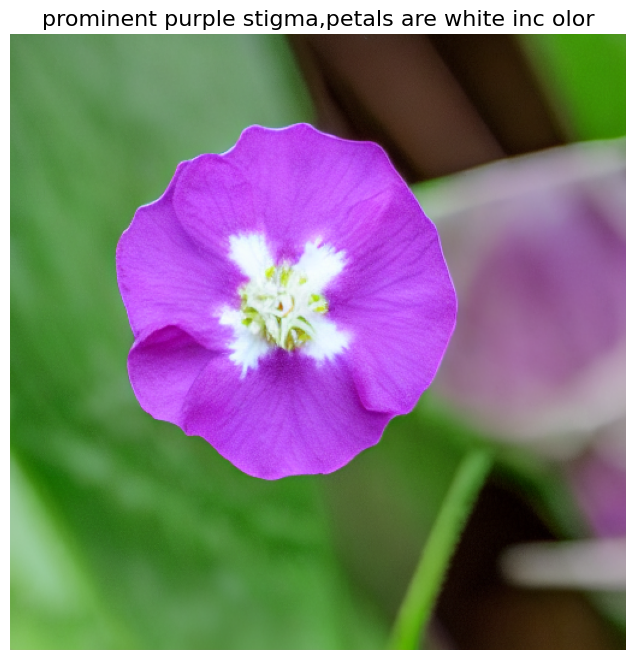

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler
from PIL import Image
import matplotlib.pyplot as plt

# Load the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Extract the components
unet = pipe.unet
text_encoder = pipe.text_encoder
scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Load the trained weights
checkpoint_path = '/content/drive/MyDrive/Flowers/unet_epoch_2.pt'
unet.load_state_dict(torch.load(checkpoint_path))
unet.eval()  # Set UNet to evaluation mode

# Convert UNet back to float16
unet = unet.to(torch.float16)

# Replace the pipeline's UNet with the trained UNet
pipe.unet = unet

# Define the text prompt
prompt = "prominent purple stigma,petals are white inc olor"

# Generate the image
with torch.no_grad():
    generated_images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5)

# Save the image
output_path = "/content/drive/MyDrive/Flowers/generated_image.png"
generated_images.images[0].save(output_path)
print(f"Image saved to {output_path}")

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(generated_images.images[0])
plt.axis("off")
plt.title(prompt, fontsize=16)
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-30-b34e544969b5>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load(checkpoint_path))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

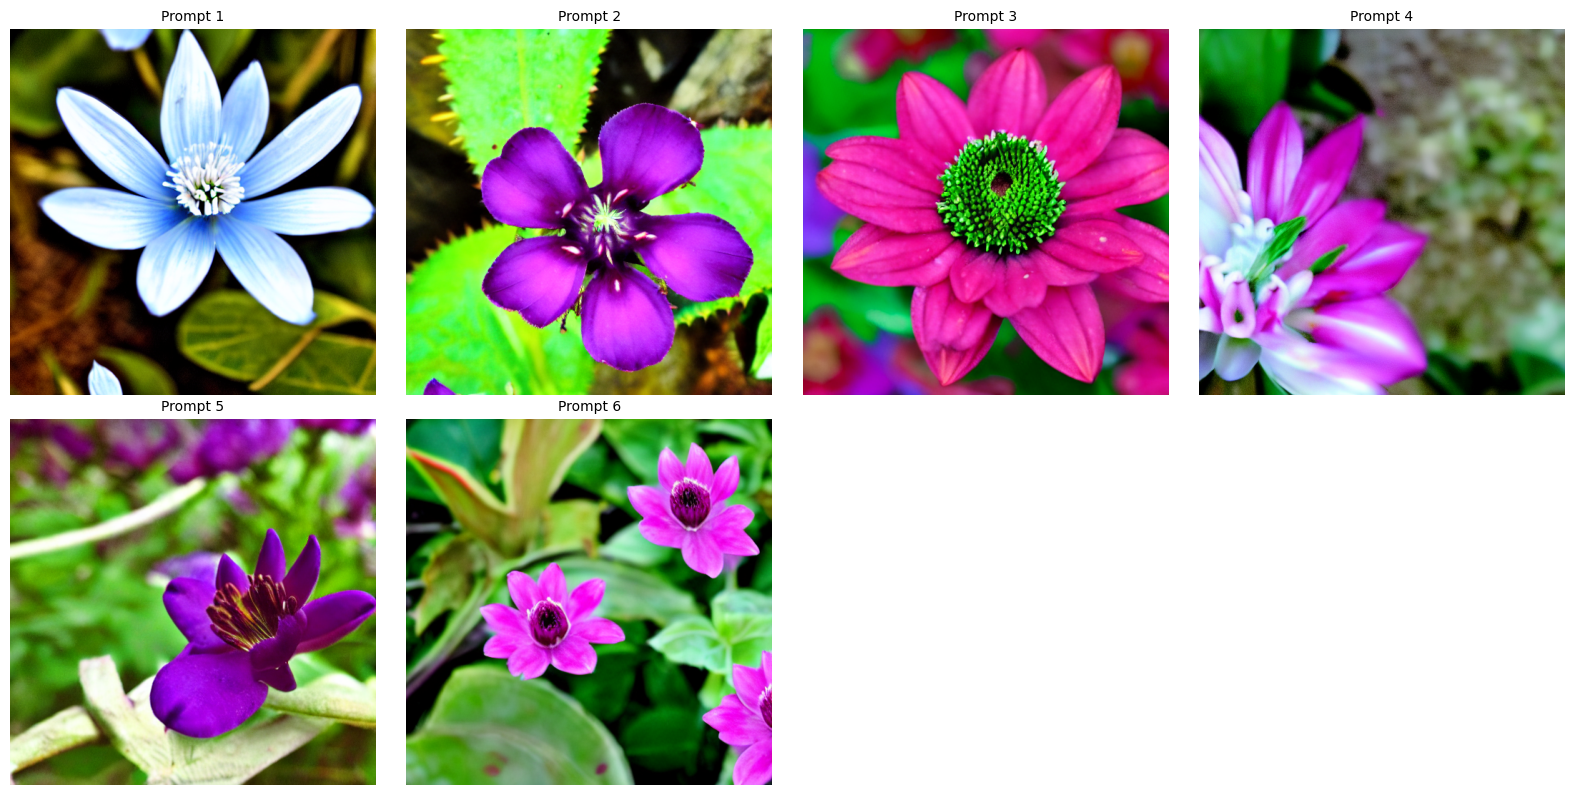

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler
from PIL import Image
import matplotlib.pyplot as plt

# Load the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Extract the components
unet = pipe.unet
text_encoder = pipe.text_encoder
scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Load the trained weights
checkpoint_path = '/content/drive/MyDrive/Flowers/unet_epoch_2.pt'
unet.load_state_dict(torch.load(checkpoint_path))
unet.eval()  # Set UNet to evaluation mode

# Convert UNet back to float16
unet = unet.to(torch.float16)

# Replace the pipeline's UNet with the trained UNet
pipe.unet = unet

# List of prompts
prompts = [
    "This flower is white and blue in color, with petals that are oval shaped.",
    "This flower has bright purple, spiky petals, and greenish sepals below them.",
    "This flower has green petals and purple and green stamen.",
    "The flower has stamen and the petals are green in color.",
    "This flower has petals that are green and has purple stringy stamen.",
    "This flower is pink and purple in color, and has petals that are oval."
]

# Generate and display images in a grid
images = []
for prompt in prompts:
    with torch.no_grad():
        generated_image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
        images.append((prompt, generated_image))

# Display images in a grid (4 per row)
rows = (len(images) + 3) // 4  # Calculate number of rows needed
plt.figure(figsize=(16, 4 * rows))

for i, (prompt, img) in enumerate(images):
    plt.subplot(rows, 4, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prompt {i+1}", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import os
import random
import numpy as np
from PIL import Image
from torchvision import transforms
from scipy.linalg import sqrtm
import torch
from diffusers import StableDiffusionPipeline
from torchvision.models import inception_v3

# Paths
prompt_file = '/content/drive/MyDrive/flowers/prompts.txt'
generated_images_dir = '/content/drive/MyDrive/flowers/generated_images'

# Create directory to save generated images
os.makedirs(generated_images_dir, exist_ok=True)

# Parse prompts file to get image paths and prompts
with open(prompt_file, 'r') as f:
    lines = [line.strip() for line in f.readlines() if line.strip()]  # Remove empty lines

# Safely extract image paths and prompts
image_prompt_pairs = []
for line in lines:
    parts = line.split('\t')  # Split by tab
    if len(parts) == 2:  # Ensure valid format
        image_path, prompt = parts
        image_prompt_pairs.append((image_path.strip(), prompt.strip()))

if not image_prompt_pairs:
    raise ValueError("No valid image-prompt pairs found in the prompts file.")

# Select 10 random image-prompt pairs
selected_pairs = random.sample(image_prompt_pairs, 10)
real_image_paths = [pair[0] for pair in selected_pairs]
selected_prompts = [pair[1] for pair in selected_pairs]

# Load the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# Load fine-tuned UNet weights
checkpoint_path = '/content/drive/MyDrive/Flowers/unet_epoch_2.pt'
pipe.unet.load_state_dict(torch.load(checkpoint_path))
pipe.unet = pipe.unet.to(torch.float16).eval()

# Generate images
generated_images = []
for idx, prompt in enumerate(selected_prompts):
    with torch.no_grad():
        generated_image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
        generated_image.save(os.path.join(generated_images_dir, f"generated_{idx}.png"))
        generated_images.append(generated_image)

print(f"Generated images saved in {generated_images_dir}")

# FID Calculation
def calculate_fid(real_images, generated_images):
    model = inception_v3(pretrained=True, transform_input=False).eval().to("cuda")

    def get_activations(images):
        preprocess = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ])
        images = [preprocess(img).unsqueeze(0) for img in images]
        images = torch.cat(images, dim=0).to("cuda")
        with torch.no_grad():
            activations = model(images).cpu().numpy()
        return activations

    real_activations = get_activations(real_images)
    generated_activations = get_activations(generated_images)

    mu_real, sigma_real = real_activations.mean(axis=0), np.cov(real_activations, rowvar=False)
    mu_gen, sigma_gen = generated_activations.mean(axis=0), np.cov(generated_activations, rowvar=False)

    diff = mu_real - mu_gen
    covmean = sqrtm(sigma_real @ sigma_gen)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = diff.dot(diff) + np.trace(sigma_real + sigma_gen - 2 * covmean)
    return fid

# Prepare real and generated images for FID
real_images = [Image.open(img).convert("RGB") for img in real_image_paths]
fid_score = calculate_fid(real_images, generated_images)
print(f"FID Score: {fid_score}")

# Inception Score Calculation
def calculate_inception_score(images, splits=10):
    model = inception_v3(pretrained=True, transform_input=False).eval().to("cuda")

    preprocess = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ])

    def get_predictions(images):
        images = [preprocess(img).unsqueeze(0) for img in images]
        images = torch.cat(images, dim=0).to("cuda")
        with torch.no_grad():
            preds = torch.softmax(model(images), dim=1).cpu().numpy()
        return preds

    preds = get_predictions(images)

    split_scores = []
    for i in range(splits):
        part = preds[i * len(preds) // splits: (i + 1) * len(preds) // splits]
        py = np.mean(part, axis=0)
        scores = [np.sum(p * np.log(p / py)) for p in part]
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

# Calculate IS
is_mean, is_std = calculate_inception_score(generated_images)
print(f"Inception Score: Mean={is_mean}, Std={is_std}")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-37-0c316a37111d>:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pipe.unet.load_state_dict(torch.load(checkpoint_path))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated images saved in /content/drive/MyDrive/flowers/generated_images


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 218MB/s] 


FID Score: 1241.4662428192432
Inception Score: Mean=1.0, Std=0.0


In [ ]:
import os
import random
import shutil
import numpy as np
from PIL import Image
from torchvision import transforms
from scipy.linalg import sqrtm
import torch
from diffusers import StableDiffusionPipeline
from torchvision.models import inception_v3

from google.colab import drive
import kagglehub

# Mount Google Drive
drive.mount('/content/drive')

# Paths
prompt_file = '/content/drive/MyDrive/flowers/prompts.txt'
generated_images_original_dir = '/content/drive/MyDrive/flowers/generated_images'

# Create directory to save generated and real images
os.makedirs(generated_images_dir, exist_ok=True)

# Parse prompts file to get image paths and prompts
with open(prompt_file, 'r') as f:
    lines = [line.strip() for line in f.readlines() if line.strip()]  # Remove empty lines

# Safely extract image paths and prompts
image_prompt_pairs = []
for line in lines:
    parts = line.split('\t')  # Split by tab
    if len(parts) == 2:  # Ensure valid format
        image_path, prompt = parts
        image_prompt_pairs.append((image_path.strip(), prompt.strip()))

if not image_prompt_pairs:
    raise ValueError("No valid image-prompt pairs found in the prompts file.")

# Select 10 random image-prompt pairs
selected_pairs = random.sample(image_prompt_pairs, 20)
real_image_paths = [pair[0] for pair in selected_pairs]
selected_prompts = [pair[1] for pair in selected_pairs]

# Copy real images to the generated images folder
for idx, real_image_path in enumerate(real_image_paths):
    real_image_save_path = os.path.join(generated_images_dir, f"real_{idx}.png")
    shutil.copy(real_image_path, real_image_save_path)  # Copy real image for comparison

# Load the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# Load fine-tuned UNet weights
checkpoint_path = '/content/drive/MyDrive/Flowers/unet_epoch_2.pt'
pipe.unet.load_state_dict(torch.load(checkpoint_path))
pipe.unet = pipe.unet.to(torch.float16).eval()

# Generate images and save them
generated_images = []
for idx, prompt in enumerate(selected_prompts):
    with torch.no_grad():
        generated_image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
        generated_image.save(os.path.join(generated_images_dir, f"generated_{idx}.png"))
        generated_images.append(generated_image)

print(f"Real and generated images saved in {generated_images_dir}")

# FID Calculation
def calculate_fid(real_images, generated_images):
    model = inception_v3(pretrained=True, transform_input=False).eval().to("cuda")

    def get_activations(images):
        preprocess = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ])
        images = [preprocess(img).unsqueeze(0) for img in images]
        images = torch.cat(images, dim=0).to("cuda")
        with torch.no_grad():
            activations = model(images).cpu().numpy()
        return activations

    real_activations = get_activations(real_images)
    generated_activations = get_activations(generated_images)

    mu_real, sigma_real = real_activations.mean(axis=0), np.cov(real_activations, rowvar=False)
    mu_gen, sigma_gen = generated_activations.mean(axis=0), np.cov(generated_activations, rowvar=False)

    diff = mu_real - mu_gen
    covmean = sqrtm(sigma_real @ sigma_gen)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = diff.dot(diff) + np.trace(sigma_real + sigma_gen - 2 * covmean)
    return fid

# Prepare real and generated images for FID
real_images = [Image.open(img).convert("RGB") for img in real_image_paths]
fid_score = calculate_fid(real_images, generated_images)
print(f"FID Score: {fid_score}")

# Inception Score Calculation
def calculate_inception_score(images, splits=10):
    model = inception_v3(pretrained=True, transform_input=False).eval().to("cuda")

    preprocess = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ])

    def get_predictions(images):
        images = [preprocess(img).unsqueeze(0) for img in images]
        images = torch.cat(images, dim=0).to("cuda")
        with torch.no_grad():
            preds = torch.softmax(model(images), dim=1).cpu().numpy()
        return preds

    preds = get_predictions(images)

    split_scores = []
    for i in range(splits):
        part = preds[i * len(preds) // splits: (i + 1) * len(preds) // splits]
        py = np.mean(part, axis=0)
        scores = [np.sum(p * np.log(p / py)) for p in part]
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

# Calculate IS
is_mean, is_std = calculate_inception_score(generated_images)
print(f"Inception Score: Mean={is_mean}, Std={is_std}")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-38-24d85581bd16>:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pipe.unet.load_state_dict(torch.load(checkpoint_path))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Real and generated images saved in /content/drive/MyDrive/flowers/generated_images
FID Score: 960.0225242715534
Inception Score: Mean=1.3757908344268799, Std=0.2284286618232727


In [ ]:
import os
import random
import shutil
import numpy as np
from PIL import Image
from torchvision import transforms
from scipy.linalg import sqrtm
import torch
from diffusers import StableDiffusionPipeline
from torchvision.models import inception_v3
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
prompt_file = '/content/drive/MyDrive/flowers/prompts.txt'
resized_images_dir = '/content/drive/MyDrive/flowers/generated_resized_images'
os.makedirs(resized_images_dir, exist_ok=True)

# Parse prompts file to get image paths and prompts
with open(prompt_file, 'r') as f:
    lines = [line.strip() for line in f.readlines() if line.strip()]  # Remove empty lines

# Safely extract image paths and prompts
image_prompt_pairs = []
for line in lines:
    parts = line.split('\t')  # Split by tab
    if len(parts) == 2:  # Ensure valid format
        image_path, prompt = parts
        image_prompt_pairs.append((image_path.strip(), prompt.strip()))

if not image_prompt_pairs:
    raise ValueError("No valid image-prompt pairs found in the prompts file.")

# Select 20 random image-prompt pairs
selected_pairs = random.sample(image_prompt_pairs, 100)
real_image_paths = [pair[0] for pair in selected_pairs]
selected_prompts = [pair[1] for pair in selected_pairs]

# Copy real images to the resized images folder
for idx, real_image_path in enumerate(real_image_paths):
    real_image = Image.open(real_image_path).convert("RGB")
    resized_real_image = real_image.resize((128, 128), Image.Resampling.LANCZOS)
    resized_real_image_path = os.path.join(resized_images_dir, f"real_{idx}.png")
    resized_real_image.save(resized_real_image_path)

print(f"Resized real images saved in {resized_images_dir}")

# Load the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# Load fine-tuned UNet weights
checkpoint_path = '/content/drive/MyDrive/Flowers/unet_epoch_2.pt'
pipe.unet.load_state_dict(torch.load(checkpoint_path))
pipe.unet = pipe.unet.to(torch.float16).eval()

# Generate and resize images
resized_generated_images = []
for idx, prompt in enumerate(selected_prompts):
    with torch.no_grad():
        generated_image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
        resized_generated_image = generated_image.resize((128, 128), Image.Resampling.LANCZOS)
        resized_generated_image_path = os.path.join(resized_images_dir, f"generated_{idx}.png")
        resized_generated_image.save(resized_generated_image_path)
        resized_generated_images.append(resized_generated_image)

print(f"Resized generated images saved in {resized_images_dir}")

# Save prompts to a text file in the resized images directory
prompts_txt_path = os.path.join(resized_images_dir, "prompts.txt")
with open(prompts_txt_path, 'w') as f:
    for idx, prompt in enumerate(selected_prompts):
        f.write(f"{idx}\t{prompt}\n")

print(f"Prompts saved at {prompts_txt_path}")

# FID Calculation
def calculate_fid(real_images, generated_images):
    model = inception_v3(pretrained=True, transform_input=False).eval().to("cuda")

    def get_activations(images):
        preprocess = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ])
        images = [preprocess(img).unsqueeze(0) for img in images]
        images = torch.cat(images, dim=0).to("cuda")
        with torch.no_grad():
            activations = model(images).cpu().numpy()
        return activations

    real_activations = get_activations(real_images)
    generated_activations = get_activations(generated_images)

    mu_real, sigma_real = real_activations.mean(axis=0), np.cov(real_activations, rowvar=False)
    mu_gen, sigma_gen = generated_activations.mean(axis=0), np.cov(generated_activations, rowvar=False)

    diff = mu_real - mu_gen
    covmean = sqrtm(sigma_real @ sigma_gen)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = diff.dot(diff) + np.trace(sigma_real + sigma_gen - 2 * covmean)
    return fid

# Prepare real and resized generated images for FID
real_images = [Image.open(os.path.join(resized_images_dir, f"real_{idx}.png")).convert("RGB") for idx in range(len(real_image_paths))]
fid_score = calculate_fid(real_images, resized_generated_images)
print(f"FID Score: {fid_score}")

# Inception Score Calculation
def calculate_inception_score(images, splits=10):
    model = inception_v3(pretrained=True, transform_input=False).eval().to("cuda")

    preprocess = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ])

    def get_predictions(images):
        images = [preprocess(img).unsqueeze(0) for img in images]
        images = torch.cat(images, dim=0).to("cuda")
        with torch.no_grad():
            preds = torch.softmax(model(images), dim=1).cpu().numpy()
        return preds

    preds = get_predictions(images)

    split_scores = []
    for i in range(splits):
        part = preds[i * len(preds) // splits: (i + 1) * len(preds) // splits]
        py = np.mean(part, axis=0)
        scores = [np.sum(p * np.log(p / py)) for p in part]
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

# Calculate IS
is_mean, is_std = calculate_inception_score(resized_generated_images)
print(f"Inception Score: Mean={is_mean}, Std={is_std}")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/drive
Resized real images saved in /content/drive/MyDrive/flowers/generated_resized_images


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-1-45ec578fbd95>:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pipe.unet.load_state_dict(torch.load(checkpoint_path))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Resized generated images saved in /content/drive/MyDrive/flowers/generated_resized_images
Prompts saved at /content/drive/MyDrive/flowers/generated_resized_images/prompts.txt


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 163MB/s] 


FID Score: 739.7681602967455
Inception Score: Mean=1.36815345287323, Std=0.2077542245388031
